In [220]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/del/Desktop/机器学习Pre/')

# ROI示例

# HOG(检测边缘)

## 1.预处理，gama矫正

(1280, 720, 3)


Text(0.5, 1.0, 'Gama = 3')

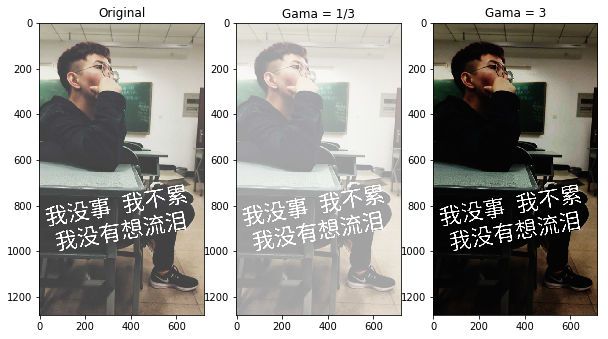

In [205]:
XZ_1 = cv2.imread('1.jpg')
#gama = 1/2
XZ_1_gama1 = np.power(XZ_1/float(np.max(XZ_1)), 1/3)
#gama = 2
XZ_1_gama2 = np.power(XZ_1/float(np.max(XZ_1)), 3)
print(XZ_1.shape)
plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
plt.imshow(XZ_1[:,:,[2,1,0]])
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(XZ_1_gama1[:,:,[2,1,0]])
plt.title('Gama = 1/3')
plt.subplot(1,3,3)
plt.imshow(XZ_1_gama2[:,:,[2,1,0]])
plt.title('Gama = 3')

# 2.计算横向和纵向梯度

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'XZ_G(Sobel)_Normal')

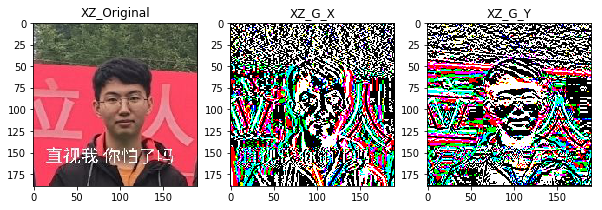

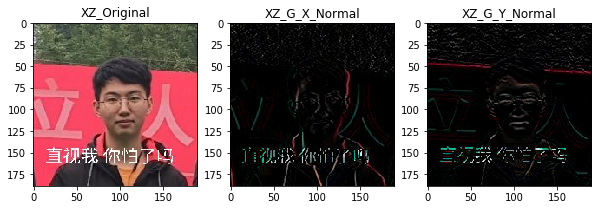

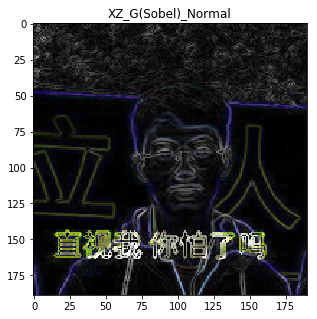

In [203]:
XZ_1 = cv2.imread('7.jpg')
#水平梯度
XZ_1_X = cv2.Sobel(XZ_1, cv2.CV_32F, 1, 0, ksize=1)
#垂直梯度
XZ_1_Y = cv2.Sobel(XZ_1, cv2.CV_32F, 0, 1, ksize=1)
plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
plt.imshow(XZ_1[:,:,[2,1,0]])
plt.title('XZ_Original')
plt.subplot(1,3,2)
plt.title('XZ_G_X')
plt.imshow(XZ_1_X[:,:,[2,1,0]])
plt.subplot(1,3,3)
plt.imshow(XZ_1_Y[:,:,[2,1,0]])
plt.title('XZ_G_Y')

XZ_1 = np.float32(XZ_1) / 255.0
XZ_1_X = cv2.Sobel(XZ_1, cv2.CV_32F, 1, 0, ksize=1)
#垂直梯度
XZ_1_Y = cv2.Sobel(XZ_1, cv2.CV_32F, 0, 1, ksize=1)
plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
plt.imshow(XZ_1[:,:,[2,1,0]])
plt.title('XZ_Original')
plt.subplot(1,3,2)
plt.title('XZ_G_X_Normal')
plt.imshow(XZ_1_X[:,:,[2,1,0]])
plt.subplot(1,3,3)
plt.imshow(XZ_1_Y[:,:,[2,1,0]])
plt.title('XZ_G_Y_Normal')

plt.figure(figsize=[5,5])
Combine = (XZ_1_X**2 + XZ_1_Y**2)**0.5
Orientation = np.abs(np.arctan2(XZ_1_Y,XZ_1_X))


plt.imshow(Combine)
plt.title("XZ_G(Sobel)_Normal")

## Canny+HOG

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'XZ_Canny+Sobel')

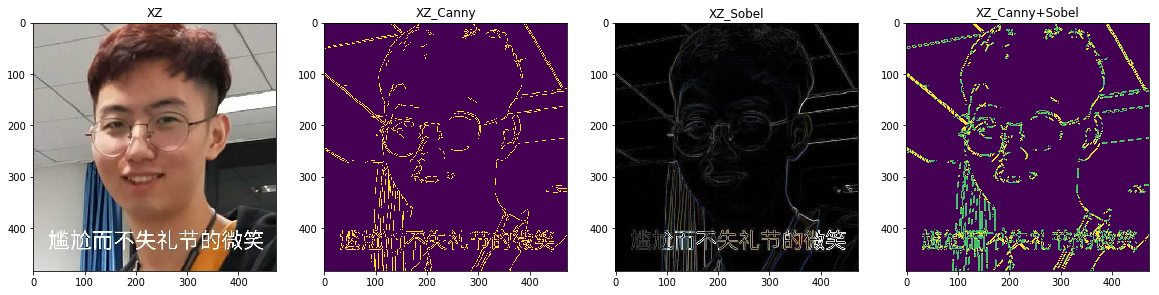

In [102]:
XZ = cv2.imread('5.jpg',0)
XZ_Canny = cv2.Canny(XZ,100,200)
#水平梯度
XZ_X = cv2.Sobel(XZ_Canny, cv2.CV_32F, 1, 0, ksize=1)
#垂直梯度
XZ_Y = cv2.Sobel(XZ_Canny, cv2.CV_32F, 0, 1, ksize=1)

XZ = cv2.imread('5.jpg')
XZ = np.float32(XZ) / 255.0
#水平梯度
XZ_X2 = cv2.Sobel(XZ, cv2.CV_32F, 1, 0, ksize=1)
#垂直梯度
XZ_Y2 = cv2.Sobel(XZ, cv2.CV_32F, 0, 1, ksize=1)


Combine1 = (XZ_X**2 + XZ_Y**2)**0.5
Combine2 = (XZ_X2**2 + XZ_Y2**2)**0.5
plt.figure(figsize=[20,20])
plt.subplot(1,4,1)
plt.imshow(XZ[:,:,[2,1,0]])
plt.title('XZ')
plt.subplot(1,4,2)
plt.imshow(XZ_Canny)
plt.title("XZ_Canny")
plt.subplot(1,4,3)
plt.title("XZ_Sobel")
plt.imshow(Combine2)
plt.subplot(1,4,4)
plt.imshow(Combine1)
plt.title("XZ_Canny+Sobel")

## 绘制直方图

[0.04210784 0.06451135 0.04288801 0.04008644 0.04572015 0.0459026
 0.03831535 0.03763383 0.04889896 0.08558255 0.08631134 0.04999255
 0.03823335 0.03973794 0.04981215 0.04971369 0.04204765 0.045134
 0.06566519 0.04170504]


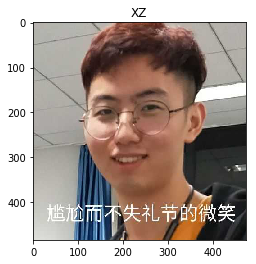

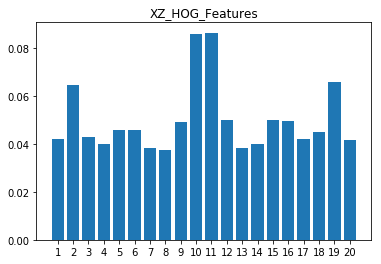

In [204]:
#定义统计函数
def Count(ore,com,split=5):
    # ore->梯度的方向，com->梯度的数值
    gap_nodes = np.linspace(0,np.pi,split)
    a = []
    count = np.zeros(split)
    for k in range(len(gap_nodes)-1):
        #print(gap_nodes)
        #print(np.where((ore<=gap_nodes[k+1])&(ore>=gap_nodes[k])))
        if k < split-2: 
            row,col = np.where((ore<gap_nodes[k+1])&(ore>=gap_nodes[k]))
        else:
            row,col = np.where((ore<=gap_nodes[k+1])&(ore>=gap_nodes[k]))
        #找到对应的梯度的值
        
        for i,j in zip(row,col):
            if com[i,j] == gap_nodes[k]:
                count[k] += com[i,j]
            elif com[i,j] == gap_nodes[k+1]:
                count[k] += com[i,j]
            else:
                count[k] += com[i,j]/2
                count[k+1] += com[i,j]/2
    #print(k)
    return count

XZ_HOG = Count(Orientation[:,:,0],Combine[:,:,0],20) + Count(Orientation[:,:,1],Combine[:,:,1],20) + Count(Orientation[:,:,2],Combine[:,:,2],20)
plt.figure(figsize=[4,4])
plt.imshow(XZ[:,:,[2,1,0]])
plt.title("XZ")
plt.figure(figsize=[6,4])
plt.bar(x = list(range(1,len(XZ_HOG)+1)),height = XZ_HOG/sum(XZ_HOG))
plt.title("XZ_HOG_Features")
plt.xticks(range(1,21))
print(XZ_HOG/sum(XZ_HOG))

# HOW特征

array([[  0.       ,   2.       ,  74.       , ...,   2.       ,
          1.       ,   4.       ],
       [ 54.666668 ,  16.11111  ,   2.       , ...,  12.222222 ,
          0.8888889,   5.       ],
       [ 20.5      ,  55.5      ,  63.25     , ...,   0.25     ,
          0.       ,   2.25     ],
       ...,
       [  0.       ,  17.       , 125.       , ...,   0.       ,
          0.       ,   0.       ],
       [  2.       ,   4.       , 131.       , ...,  20.       ,
          1.       ,   7.       ],
       [  6.75     ,   1.25     ,   0.75     , ...,   2.       ,
          2.25     ,  20.       ]], dtype=float32)

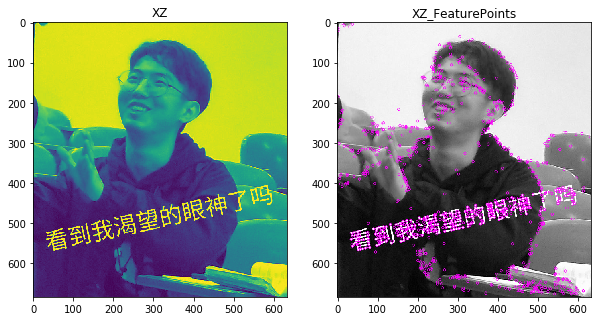

In [326]:
XZ = cv2.imread('8.jpg', cv2.IMREAD_GRAYSCALE)
#创建SIFT
sift = cv2.xfeatures2d.SIFT_create()
psd_kp1, psd_des1 = sift.detectAndCompute(XZ,None)
#标点
XZ_Feature_Point = cv2.drawKeypoints(XZ,psd_kp1,XZ,color=(255,0,255))
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(XZ)
plt.title("XZ")
plt.subplot(1,2,2)
plt.imshow(XZ_Feature_Point)
plt.title("XZ_FeaturePoints")

## 计算HOW

In [367]:
#创建BOW训练器，指定簇数为40
bow_kmeans_trainer = cv2.BOWKMeansTrainer(300)
bow_kmeans_trainer.add(psd_des1)
center = bow_kmeans_trainer.cluster()

#创建计算每个词向量到最近中心点数量的函数
def Compute(des,center,num_cluster):
    center_count = np.zeros(num_cluster)
    for i in des:
        a = []
        for j in center:
            #计算每个点与中心的欧式距离
            k = np.sqrt(np.sum(np.square(i - j)))
            #print(k)
            a.append(k)
        index = np.argmin(a)
        center_count[index] += 1
    center_count = np.array(center_count)
    return center_count
center_count = Compute(des = psd_des1, center = center, num_cluster = 300)

[0.00076394 0.00381971 0.00534759 0.00305577 0.00305577 0.00458365
 0.00305577 0.00534759 0.00229183 0.00076394 0.00305577 0.00458365
 0.0091673  0.00305577 0.00152788 0.00152788 0.00840336 0.01909855
 0.00534759 0.00152788 0.00076394 0.00152788 0.00458365 0.00076394
 0.00152788 0.00229183 0.00534759 0.01604278 0.00611154 0.00458365
 0.00305577 0.00840336 0.00152788 0.00152788 0.00229183 0.00381971
 0.00381971 0.00993125 0.00305577 0.00305577 0.00458365 0.00381971
 0.00458365 0.00229183 0.00076394 0.00534759 0.00076394 0.00076394
 0.00076394 0.00687548 0.00305577 0.00687548 0.00305577 0.00076394
 0.00229183 0.00458365 0.00611154 0.01298701 0.00152788 0.00458365
 0.00229183 0.01298701 0.00305577 0.00305577 0.00152788 0.00152788
 0.00305577 0.00840336 0.00305577 0.00229183 0.00458365 0.00305577
 0.00152788 0.00229183 0.00687548 0.00229183 0.00229183 0.00305577
 0.00381971 0.00305577 0.00305577 0.00152788 0.00229183 0.00229183
 0.00381971 0.00076394 0.01375095 0.00381971 0.01145913 0.0022

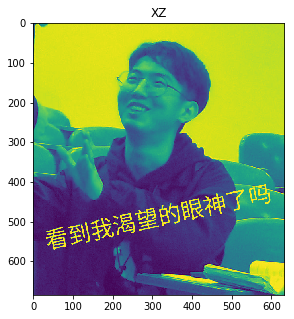

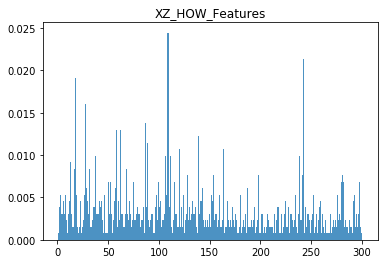

In [405]:
plt.figure(figsize=[5,5])
plt.imshow(XZ)
plt.title("XZ")
plt.figure(figsize=[6,4])
plt.bar(x = list(range(1,len(center_count)+1)),height = center_count/sum(center_count),alpha = 0.8,width = 1)
plt.title('XZ_HOW_Features')
print(center_count/sum(center_count))